# Simple Linear Regression - Supervised Model


## Import Library


In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
##pd.options.display.max_rows = 999

In [252]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


 independent variable = feature = estimator = attribute = input

dependent variable   = target  = label     = output

rows = observation, sample

**features** = TV + radio + newspaper

**target** = sales

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [225]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


## Create new independent variable (feature)

In [226]:
df["Total_spend"]= df["TV"] + df["radio"] + df["newspaper"] # Her satır içinToplam Harcama  sütunu oluşturduk.

In [227]:
df.head()

,TV,radio,newspaper,sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [228]:
df= df.iloc[:, [0,1,2,4,3]]
df.head()

,TV,radio,newspaper,Total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


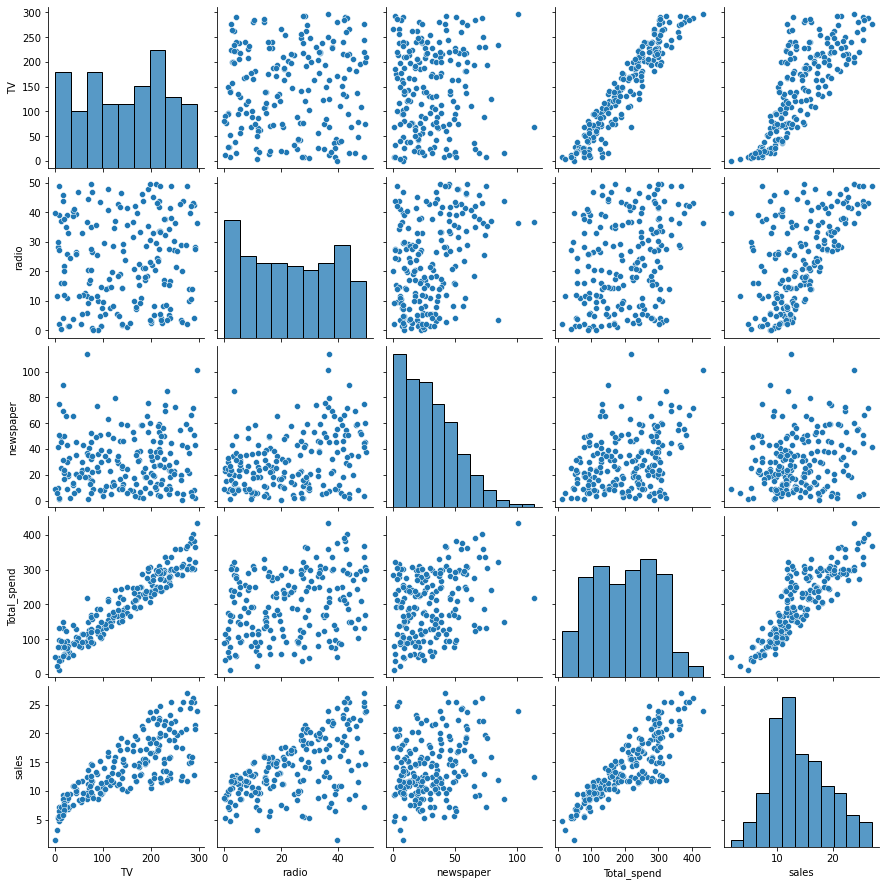

In [229]:
sns.pairplot(df);

## Which feature is more suitable for linear regression?

In [230]:
for i in df.drop(columns="sales"):                         # Sales ile diğer sütunlar arasındaki ilişkiyi kontrol ediyoruz.
    
    print(f"corr between sales and {i:<12} :    {df.sales.corr(df[i])} " )  

corr between sales and TV           :    0.7822244248616066 
corr between sales and radio        :    0.5762225745710552 
corr between sales and newspaper    :    0.22829902637616534 
corr between sales and Total_spend  :    0.8677123027017418 


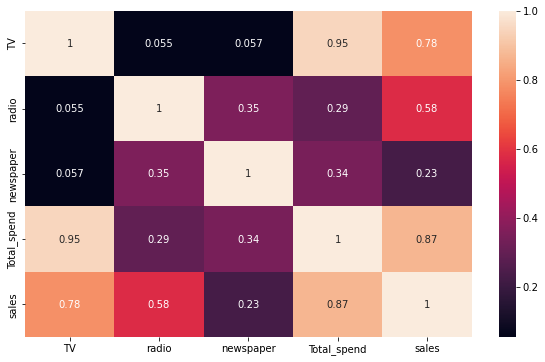

In [231]:
sns.heatmap(df.corr(), annot= True); # Sütunlar arası korelasyon ilişkisine bakılıyor

In [232]:
df = df[["Total_spend", "sales"]] # Simple regression göstermek için Sales ve Total_spend sütunlarıyla devam edeceğiz.
                                    # Normal df ile devam edilirse multiregression olacaktı.
df.sample(5)

,Total_spend,sales
34,104.5,9.5
111,302.9,21.8
144,149.9,11.4
16,218.4,12.5
118,241.8,15.9


## Plotting the relationship between independent variable and dependent variable 

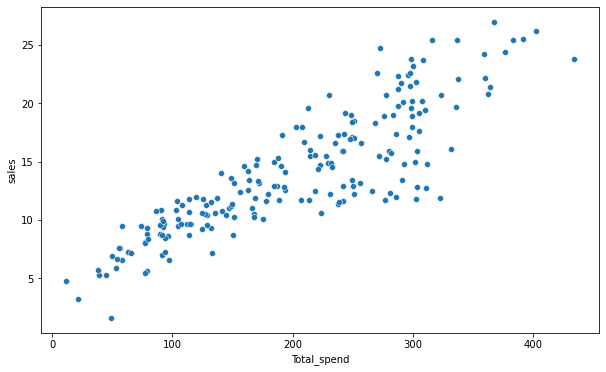

In [233]:
sns.scatterplot(x= "Total_spend", y= "sales", data = df);

## Correlation between independent variable and dependent variable

In [234]:
corr= df.sales.corr(df.Total_spend)
corr

0.8677123027017418

In [235]:
df.Total_spend.corr(df.sales)

0.8677123027017419

## Coefficient of determination (R^2)

In [236]:
R2_score= corr**2 # bu datayla %75 oranıyla satışlarımı açıklayabiliriz.
R2_score

0.7529246402599592

A house price ----> 50.000 USD

B house price ----> 60.000 USD


A house ----> 2+1

B house ----> 3+1


If 3,000 USD of the variation in house prices is due to the number of rooms in the houses, what is the Coefficient of determination (R2) of the number of rooms?

### R2_score for the number of rooms in the houses

r2_score = 3000 / (60000-50000)

r2_score = 0.3

## Linear Regression

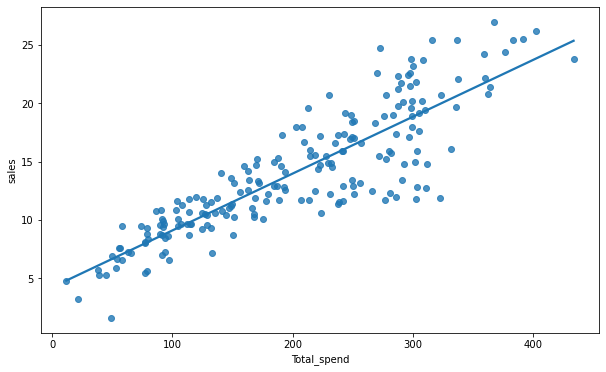

In [237]:
sns.regplot(x="Total_spend", y="sales", data =df, ci=None); 

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [238]:
# y_pred =b1x+ b0

In [239]:
X= df.Total_spend
y=df.sales

## Determination of coefficients (slope and intercept)

In [240]:
np.polyfit(X, y, deg =1)

array([0.04868788, 4.24302822])

In [241]:
slope, intercept = np.polyfit(X, y, deg= 1)

In [242]:
print("slope     :",slope)      # y=ax+b  a= slope   b= intercept
print("intercept :", intercept)

slope     : 0.048687879319048145
intercept : 4.2430282160363255


## Why do we use the least squares error method to find the regression line that best fits the data?

In [243]:
b1, b0 = np.polyfit(X, y, deg = 1)

In [244]:
print("b1 :",b1)
print("b0 :", b0)

b1 : 0.048687879319048145
b0 : 4.2430282160363255


In [245]:
y_pred = b1*X + b0

In [246]:
values = {"actual": y, "predicted": y_pred, "residual": y-y_pred, "LSE": (y-y_pred)**2}
df_2 = pd.DataFrame(values)
df_2.head()

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211


In [247]:
df_2.residual.sum().round() # Hatalarn toplamı 0'dır.

0.0

## Prediction with simple linear regression

In [248]:
potential_spend = np.linspace(0,500,100) # Tahmin için yapay data yaptık. Bir nevi X değeri gibi
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [249]:
predicted_sales_lin = b1* potential_spend + b0 # y_pred değeri
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

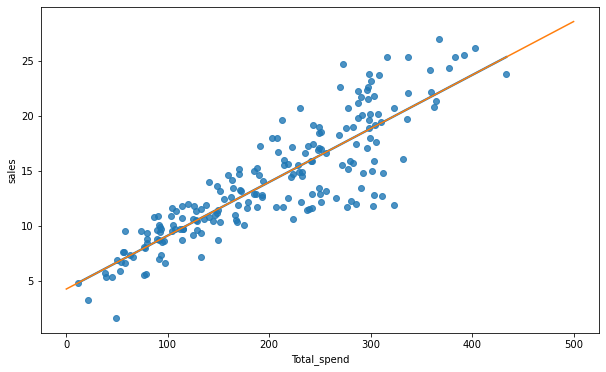

In [221]:
sns.regplot(x="Total_spend", y = "sales", data= df, ci = None,) # lineler üstüste gelmiş
plt.plot(potential_spend, predicted_sales_lin)
plt.show()